# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions
* 
Let's go through these steps!

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
df = pd.read_csv("perrin-freres-monthly-champagne-.csv")

In [108]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [109]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [110]:
df.describe()

,Perrin Freres monthly champagne sales millions ?64-?72
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [112]:
df.shape

(107, 2)

In [113]:
df.drop(104, axis = 0, inplace = True)

df.drop(105, axis = 0, inplace = True)

df.drop(106, axis = 0, inplace = True)

In [114]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
99,1972-04,4788.0
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [115]:
df['Month'] = pd.to_datetime(df['Month'])

In [116]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [117]:
df.columns = ["Month", "Sales"]

In [118]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [119]:
df.set_index('Month', inplace = True)

In [120]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [121]:
df.describe()

,Sales
count,104.000000
mean,4750.423077
std,2563.488914
min,1413.000000
25%,3106.750000
50%,4185.500000
75%,5213.500000
max,13916.000000


<Axes: xlabel='Month'>

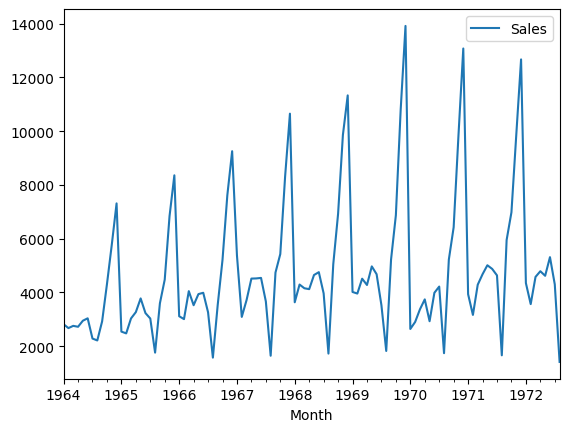

In [122]:
df.plot()

In [123]:
df.shape

(104, 1)

In [126]:
from statsmodels.tsa.stattools import adfuller

In [127]:
test_result=adfuller(df['Sales'])

In [128]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

adfuller_test(df['Sales'])

ADF Test Statistic : -1.7636531217185138
p-value : 0.3986502906962079
#Lags Used : 11
Number of Observations Used : 92
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [129]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [130]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-04-01    4577.0
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
Name: Sales, Length: 104, dtype: float64

In [131]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [132]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [133]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())


ADF Test Statistic : -7.592881835310578
p-value : 2.5042580917137546e-11
#Lags Used : 0
Number of Observations Used : 91
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

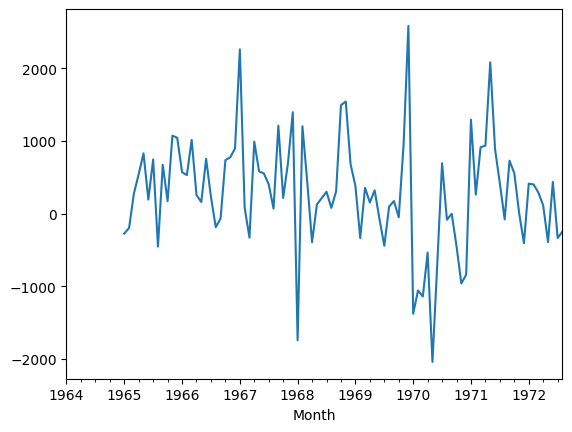

In [134]:
df['Seasonal First Difference'].plot()

In [136]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

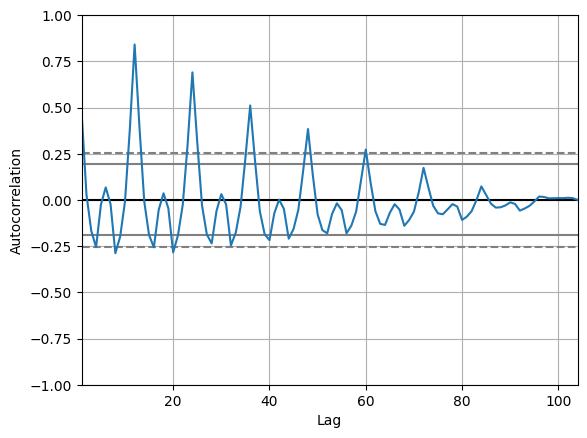

In [137]:
autocorrelation_plot(df['Sales'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags


In [138]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import statsmodels.api as sm
import matplotlib.pyplot as plt

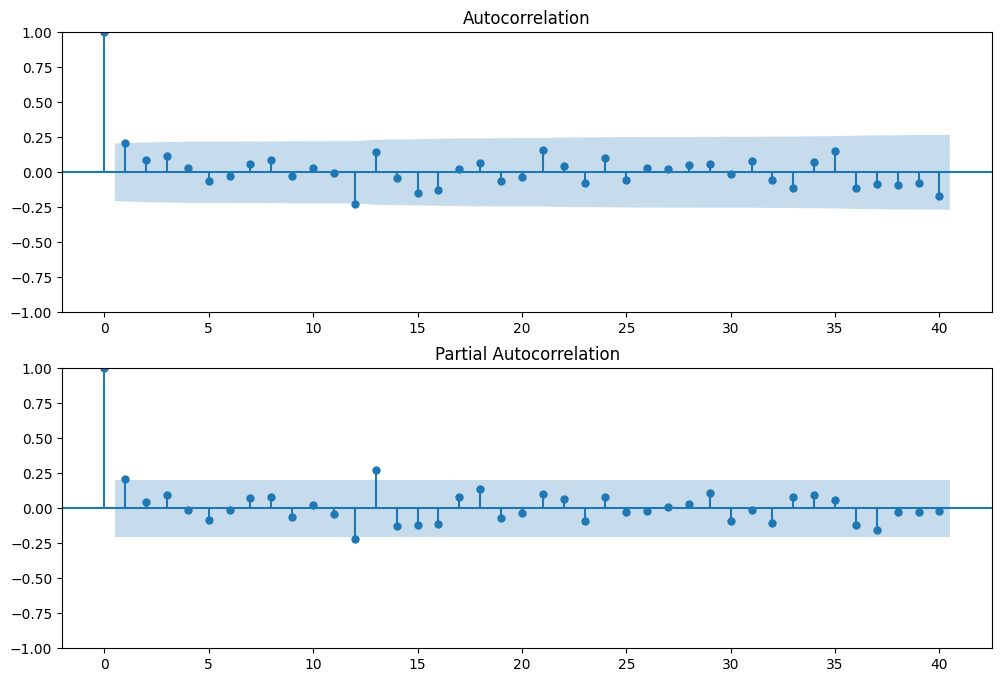

In [139]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)
plt.show()

In [140]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

import statsmodels.tsa.arima.model as arima_model

model = arima_model.ARIMA(df['Sales'], order=(1, 1, 1))

/home/sanjai/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/sanjai/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/sanjai/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [141]:
# Fit the model
model_fit = model.fit()

In [142]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -943.812
Date:                Tue, 01 Apr 2025   AIC                           1893.625
Time:                        15:42:17   BIC                           1901.529
Sample:                    01-01-1964   HQIC                          1896.826
                         - 08-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4989      0.053      9.487      0.000       0.396       0.602
ma.L1         -0.9982      0.125     -8.011      0.000      -1.242      -0.754
sigma2      5.161e+06   2.47e-08   2.09e+14      0.0

<Axes: xlabel='Month'>

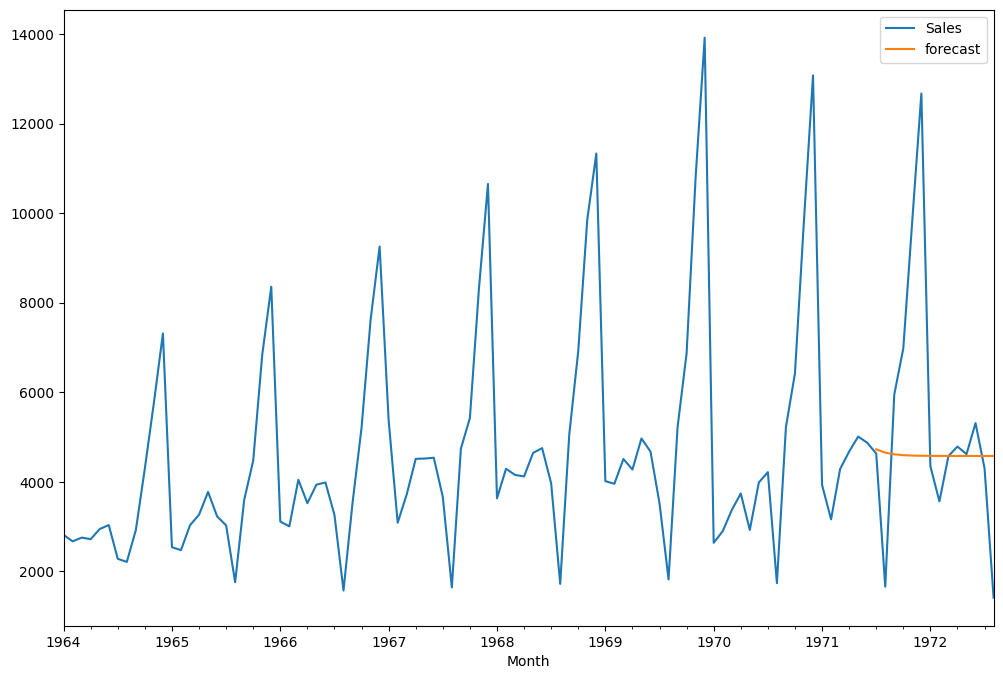

In [144]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [145]:
import statsmodels.api as sm

In [147]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/home/sanjai/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/sanjai/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [148]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/home/sanjai/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/sanjai/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

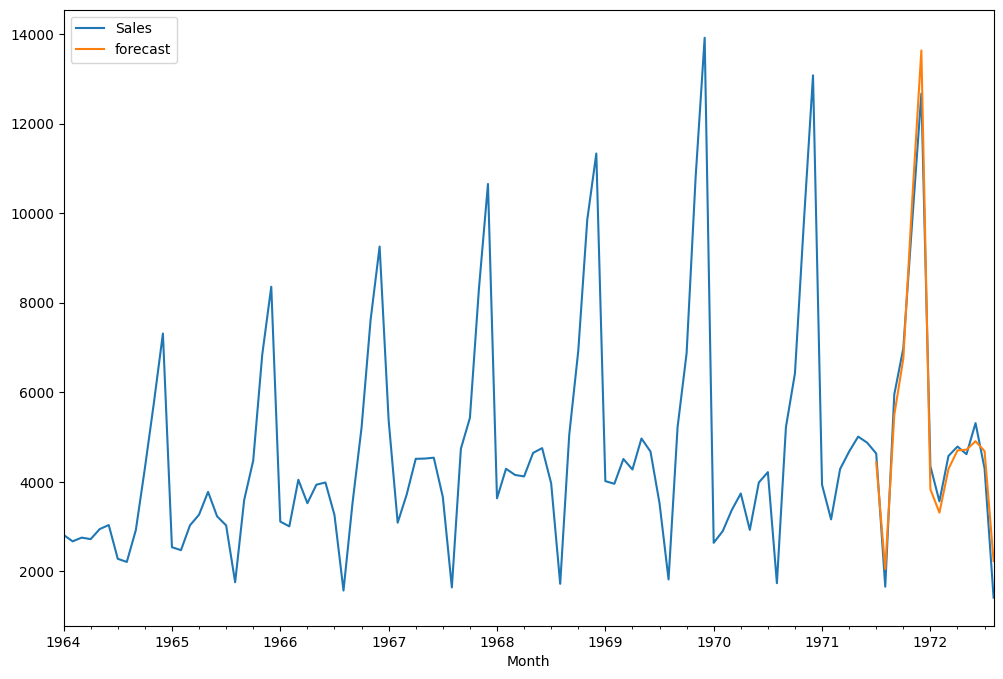

In [149]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [150]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [151]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [152]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-03-01,NaN,NaN,NaN,NaN
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN


<Axes: >

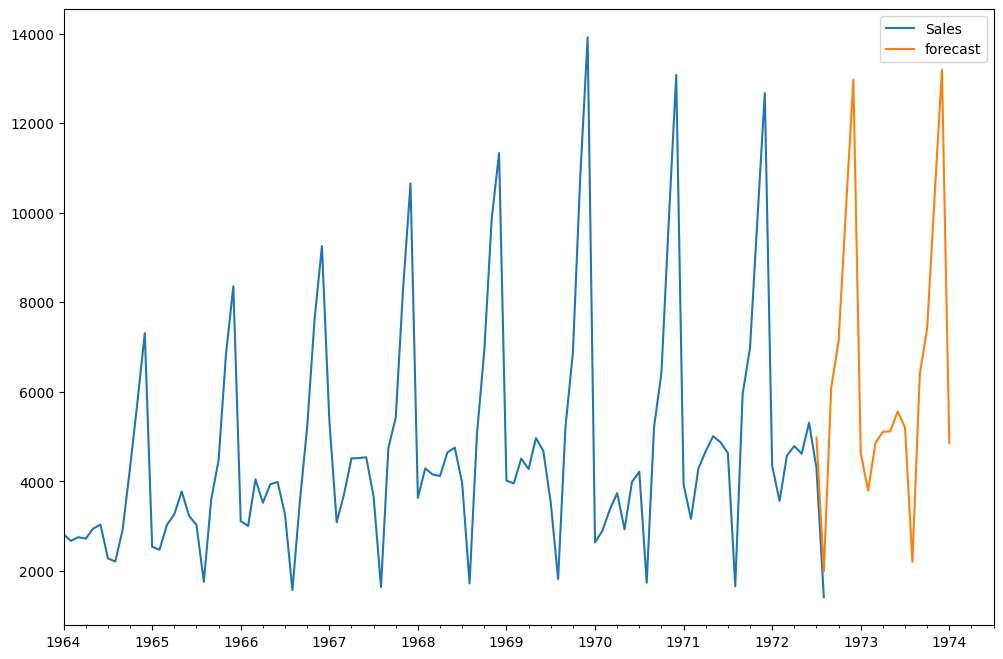

In [156]:
    future_df['forecast'] = results.predict(start = 102, end = 120, dynamic= True)  
    future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 